In [115]:
import numpy as np
import pandas as pd
import random

In [116]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [120]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
PREPARED_TRAIN_DATASET_PATH = 'train_prepared.csv'
PREPARED_TEST_DATASET_PATH = 'test_prepared.csv'
pd.options.display.max_columns=100

In [121]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)

In [122]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [123]:
train_df.shape

(10000, 20)

In [124]:
test_df = pd.read_csv(TEST_DATASET_PATH)

In [125]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [126]:
test_df.shape

(5000, 19)

In [127]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [128]:
print('lines in train dataset:', train_df.shape[0])

('lines in train dataset:', 10000)


1. EDA

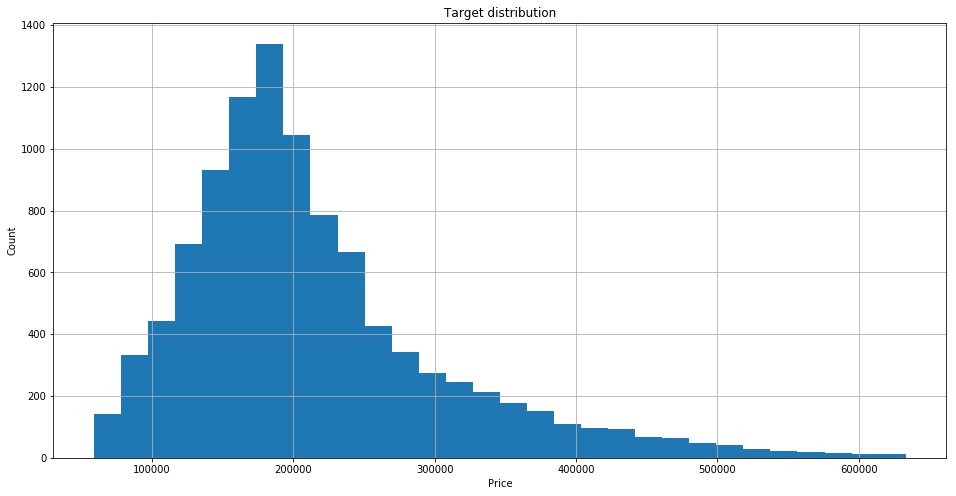

In [15]:
plt.figure(figsize = (16, 8))
train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [129]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['Id'].dtype

dtype('O')

In [130]:
train_df['DistrictId'].describe()

count    10000.000000
mean        50.400800
std         43.587592
min          0.000000
25%         20.000000
50%         36.000000
75%         75.000000
max        209.000000
Name: DistrictId, dtype: float64

In [131]:
train_df['DistrictId'].value_counts().sort_index().head()

0     48
1    652
2     78
3     82
4     11
Name: DistrictId, dtype: int64

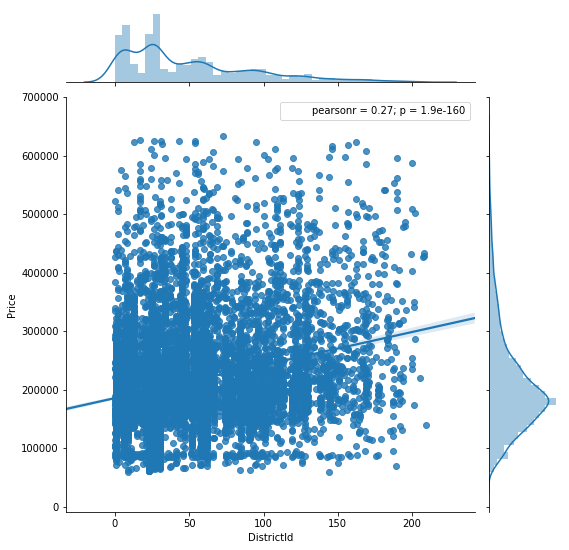

In [19]:
grid = sns.jointplot(train_df['DistrictId'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [20]:
train_df.select_dtypes(include=['object']).columns.tolist()

['Id', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null object
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(4)
memory usage: 1.5+ MB


In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [23]:
train_df['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [24]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [133]:
def kor_rooms(msv):
    msv.loc[msv['Rooms']==0, 'Rooms']=1
    msv.loc[msv['Rooms'] >= 6, 'Rooms'] = msv['Rooms'].median()

In [134]:
kor_rooms(train_df)
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [135]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [136]:
kor_rooms(test_df)
test_df['Rooms'].value_counts()

2.0    2033
1.0    1771
3.0    1099
4.0      90
5.0       7
Name: Rooms, dtype: int64

In [137]:
train_df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [138]:
test_df['Square'].describe()

count    5000.000000
mean       56.449500
std        19.092787
min         1.378543
25%        41.906231
50%        52.921340
75%        66.285129
max       223.453689
Name: Square, dtype: float64

In [31]:
def cor_square(msv,col):
    msv_new = msv[msv[col].isnull() |
                    (msv[col] < msv[col].quantile(.99)) & #max()
                    (msv[col] > msv[col].quantile(.01))]
    return msv_new[col]

In [32]:
train_df.loc[train_df['Square']>260,'Square':'KitchenSquare']

,Square,LifeSquare,KitchenSquare
1982,275.645284,233.949309,26.0
4262,604.705972,NaN,1.0
4690,409.425181,410.639749,10.0
6977,641.065193,638.163193,10.0


In [33]:
train_df['LifeSquare'].value_counts().sort_index().tail()

263.542020     1
410.639749     1
461.463614     1
638.163193     1
7480.592129    1
Name: LifeSquare, dtype: int64

In [139]:
train_df.loc[train_df['LifeSquare'] > 1000, 'LifeSquare'] = train_df['LifeSquare'].median()

In [140]:
test_df['LifeSquare'].value_counts().sort_index().tail()

128.913470    1
136.689191    1
136.921090    1
169.901701    1
303.071094    1
Name: LifeSquare, dtype: int64

In [36]:
test_df.loc[test_df['LifeSquare']>130,'Square':'KitchenSquare']

,Square,LifeSquare,KitchenSquare
410,48.713443,303.071094,6.0
2081,137.653211,136.921090,0.0
2126,136.389391,136.689191,0.0
2557,168.729035,169.901701,0.0


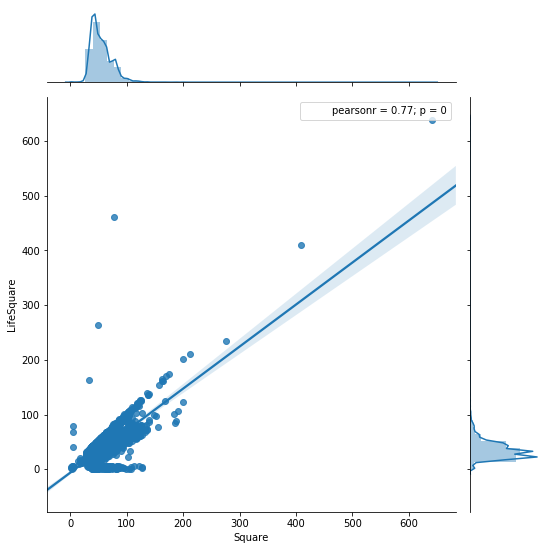

In [37]:
grid = sns.jointplot(train_df['Square'], train_df['LifeSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

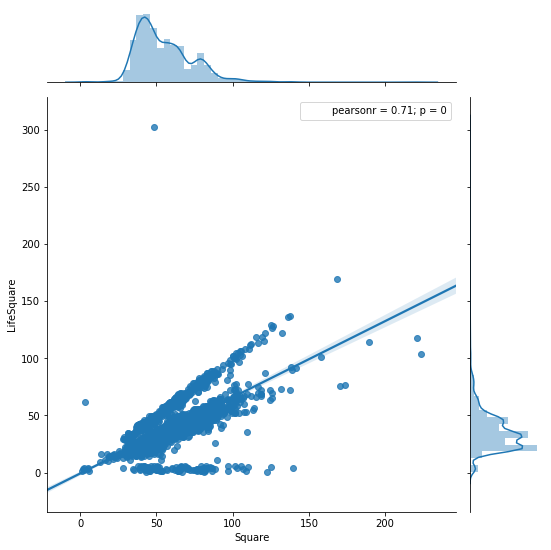

In [38]:
grid = sns.jointplot(test_df['Square'], test_df['LifeSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [46]:
#train_df.loc[train_df['Square'] > 400, 'Square'] = train_df['Square'].median()

In [88]:
#train_df[train_df['LifeSquare']>200]

количество пропущенных значений LifeSquare

In [141]:
train_df['LifeSquare'].isnull().sum()

2113

In [142]:
median = train_df['LifeSquare'].median()
median

32.781260192155735

пропущенные значения заменяем средним значением

In [143]:
train_df['LifeSquare'] = train_df['LifeSquare'].fillna(median)

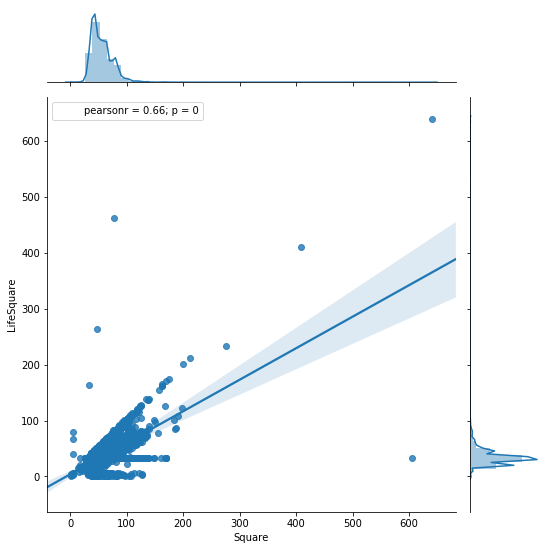

In [42]:
grid = sns.jointplot(train_df['Square'], train_df['LifeSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

появилась линия средних значений

In [21]:
train_df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [43]:
test_df['LifeSquare'].isnull().sum()

1041

In [144]:
median = test_df['LifeSquare'].median()
median

32.92508663208161

In [145]:
test_df['LifeSquare'] = test_df['LifeSquare'].fillna(median)

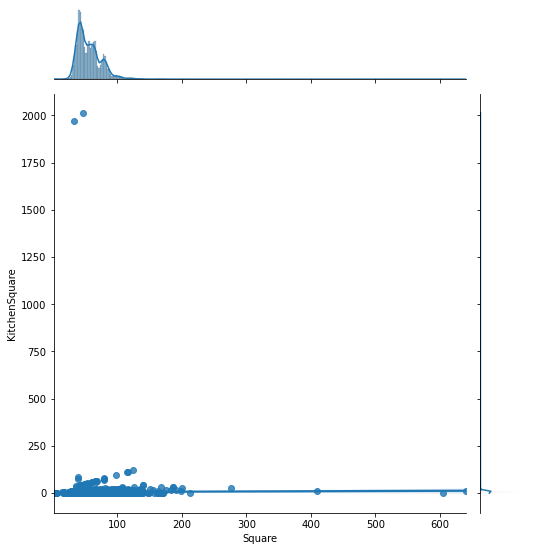

In [90]:
grid = sns.jointplot(train_df['Square'], train_df['KitchenSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [55]:
#train_df['KitchenSquare'].value_counts()

значения KitchenSquare большие 1000 заменяем медианой

In [146]:
train_df.loc[train_df['KitchenSquare'] > 1000, 'KitchenSquare'] = train_df['KitchenSquare'].median()

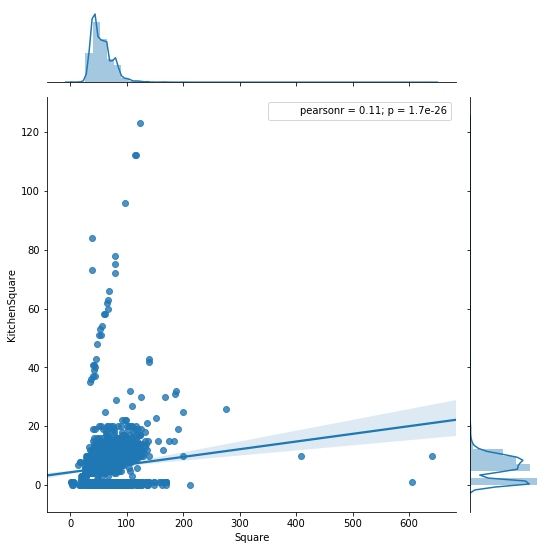

In [49]:
grid = sns.jointplot(train_df['Square'], train_df['KitchenSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [50]:
 train_df['KitchenSquare'].value_counts().sort_index().head() # 

0.0     697
1.0    2460
2.0       4
3.0      22
4.0      39
Name: KitchenSquare, dtype: int64

In [51]:
test_df['KitchenSquare'].value_counts().sort_index().tail()

62.0     1
65.0     1
97.0     1
112.0    1
620.0    1
Name: KitchenSquare, dtype: int64

In [53]:
mask = train_df["Square"] < train_df["KitchenSquare"] + train_df["LifeSquare"]
#train_df.loc[mask].describe()
train_df.loc[mask].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
48,7596,23,1.0,47.080100,46.807989,12.0,3,9.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,96029.167877
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229


In [54]:
train_df['HouseFloor'].describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [55]:
train_df['HouseFloor'].value_counts().sort_index().head()

0.0    269
1.0    497
2.0     48
3.0    127
4.0    134
Name: HouseFloor, dtype: int64

In [56]:
train_df['Floor'].describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

In [58]:
train_df.loc[train_df["HouseFloor"] < train_df["Floor"]].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600


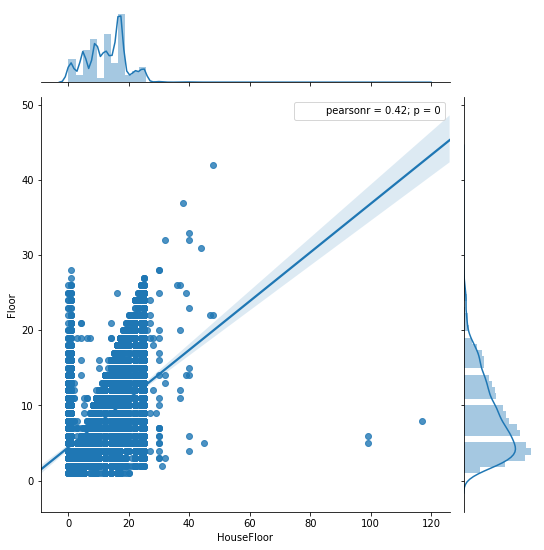

In [59]:
grid = sns.jointplot(train_df['HouseFloor'], train_df['Floor'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

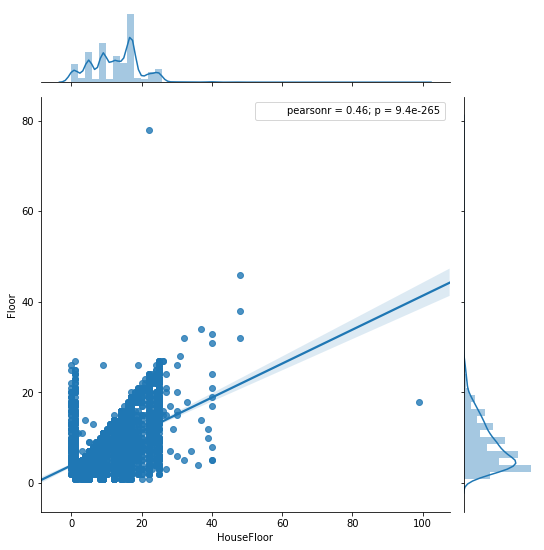

In [60]:
grid = sns.jointplot(test_df['HouseFloor'], test_df['Floor'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [62]:
train_df['HouseYear'].value_counts().head()

1977    2652
2017     308
2016     305
2015     299
2014     210
Name: HouseYear, dtype: int64

In [63]:
train_df['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [64]:
train_df[(train_df['HouseYear']>2021) | (train_df['HouseYear']<1900)]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [63]:
#train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [147]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = train_df['HouseYear'].median()

In [148]:
HouseYear_max_value = train_df['HouseYear'].quantile(q=0.975)
HouseYear_max_value

2018.0

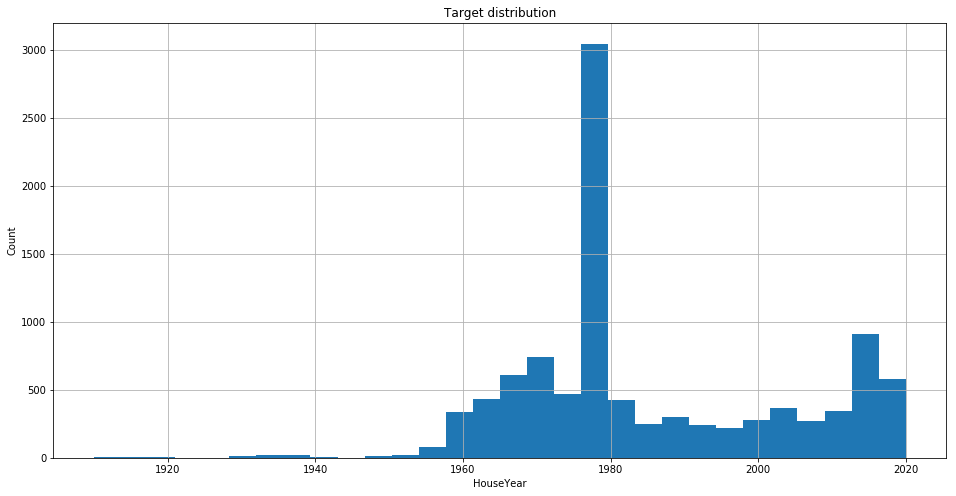

In [67]:
plt.figure(figsize = (16, 8))
train_df['HouseYear'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('HouseYear')
plt.title('Target distribution')
plt.show()

в данных HouseYear присутствует много данных 1977 года. в исходные данные была добавлена медиана.

In [68]:
test_df['HouseYear'].value_counts().head()

1977    1298
2016     172
2015     159
2017     141
1970     111
Name: HouseYear, dtype: int64

In [69]:
test_df[(test_df['HouseYear']>2021) | (test_df['HouseYear']<1900)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


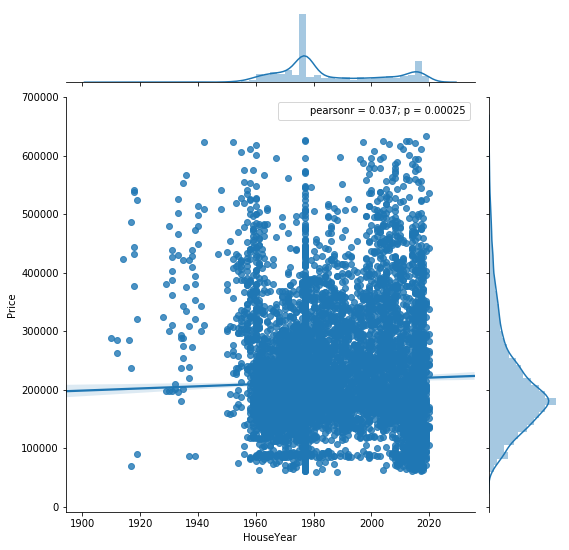

In [70]:
grid = sns.jointplot(train_df['HouseYear'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

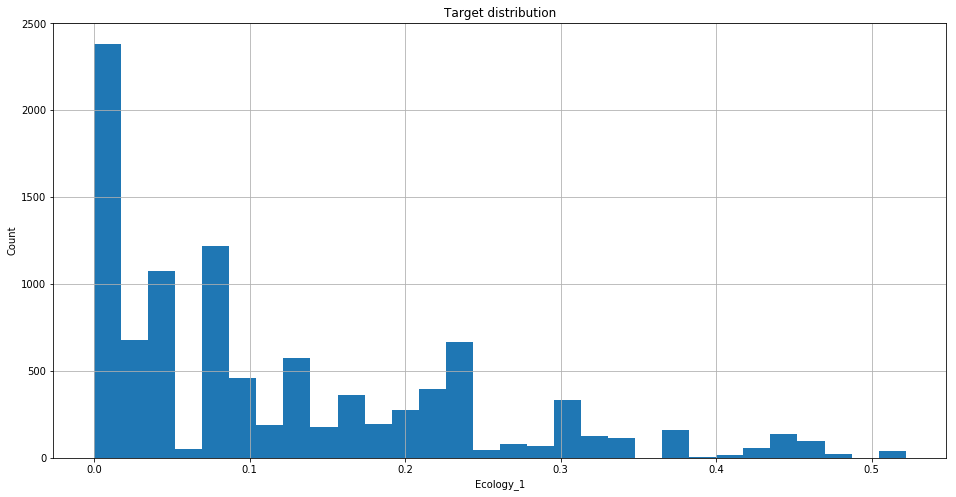

In [71]:
plt.figure(figsize = (16, 8))
train_df['Ecology_1'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Ecology_1')
plt.title('Target distribution')
plt.show()

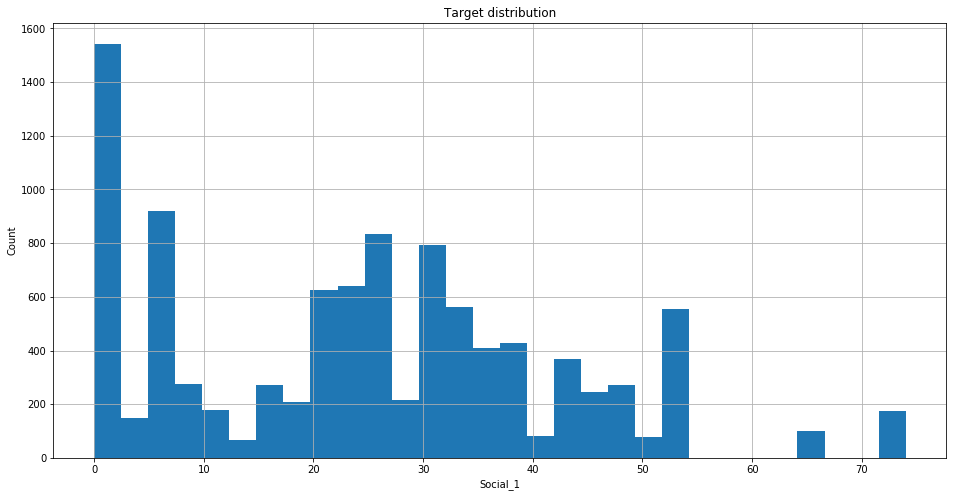

In [72]:
plt.figure(figsize = (16, 8))
train_df['Social_1'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Social_1')
plt.title('Target distribution')
plt.show()

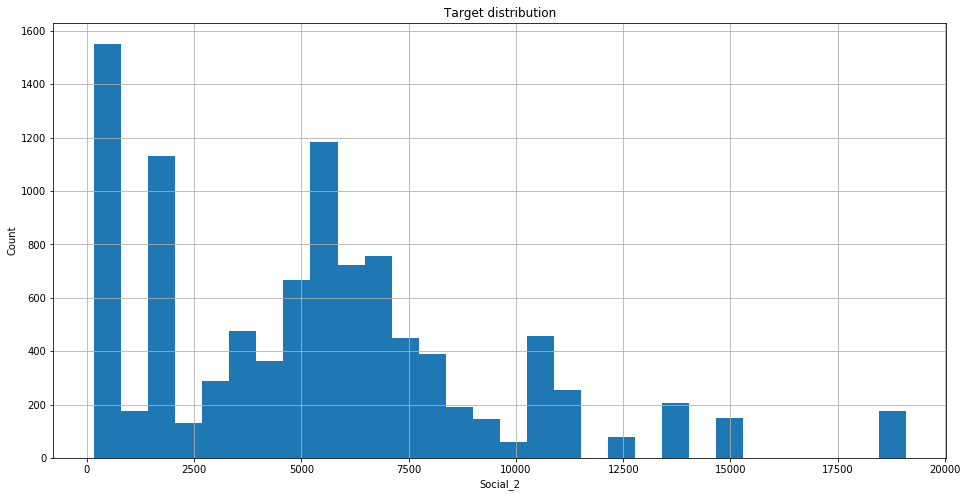

In [73]:
plt.figure(figsize = (16, 8))
train_df['Social_2'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Social_2')
plt.title('Target distribution')
plt.show()

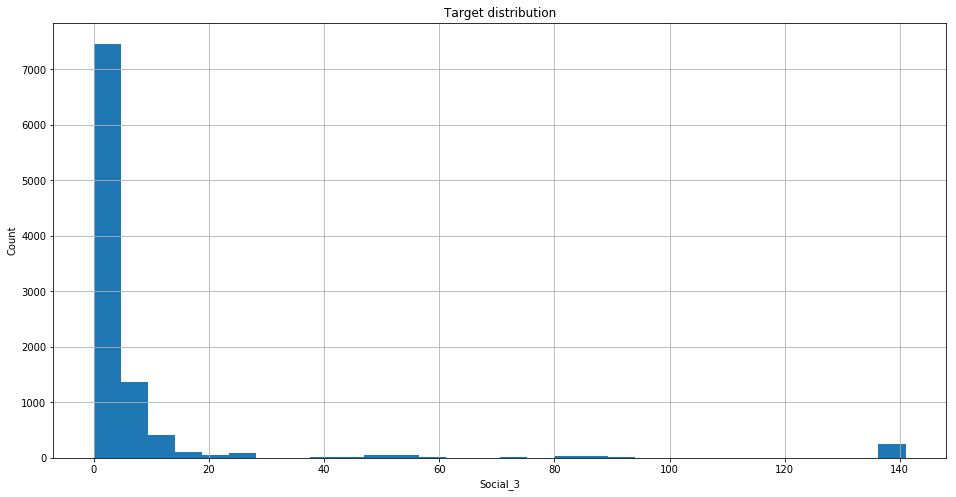

In [74]:
plt.figure(figsize = (16, 8))
train_df['Social_3'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Social_3')
plt.title('Target distribution')
plt.show()

количество пропущенных значений Healthcare_1

In [75]:
train_df['Healthcare_1'].isnull().sum()

4798

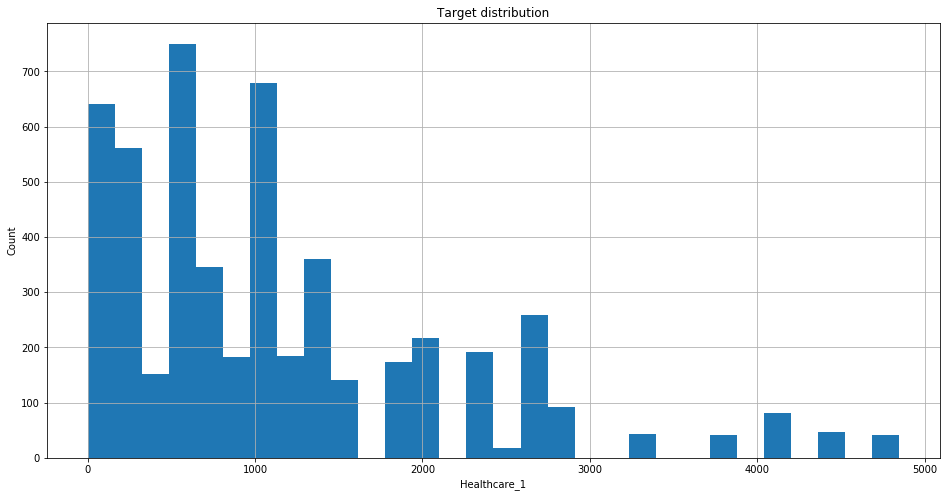

In [76]:
plt.figure(figsize = (16, 8))
train_df['Healthcare_1'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Healthcare_1')
plt.title('Target distribution')
plt.show()

In [149]:
median = train_df['Healthcare_1'].median()
train_df['Healthcare_1'] = train_df['Healthcare_1'].fillna(median)

In [150]:
median

900.0

In [151]:
train_df['Healthcare_1'].isnull().sum()

0

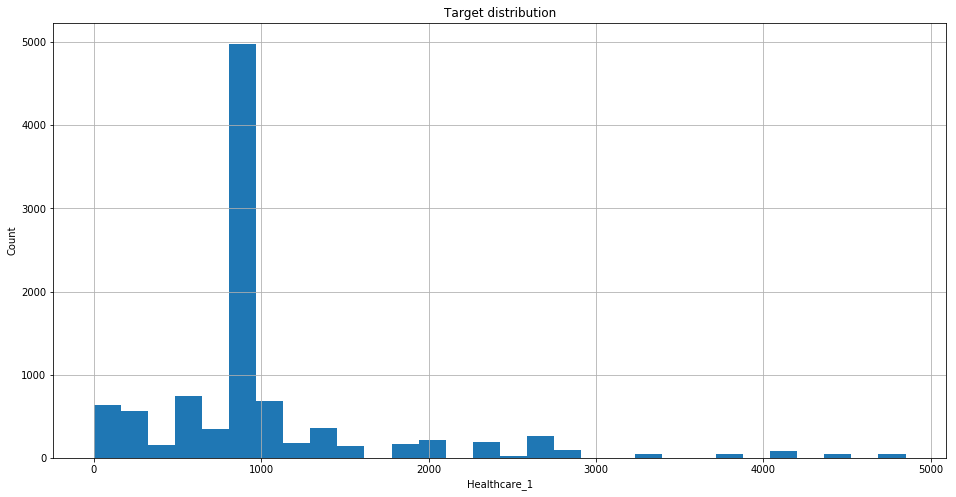

In [80]:
plt.figure(figsize = (16, 8))
train_df['Healthcare_1'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Healthcare_1')
plt.title('Target distribution')
plt.show()

In [152]:
test_df['Healthcare_1'].isnull().sum()

2377

In [153]:
median = test_df['Healthcare_1'].median()
test_df['Healthcare_1'] = test_df['Healthcare_1'].fillna(median)

In [154]:
test_df['Healthcare_1'].isnull().sum()

0

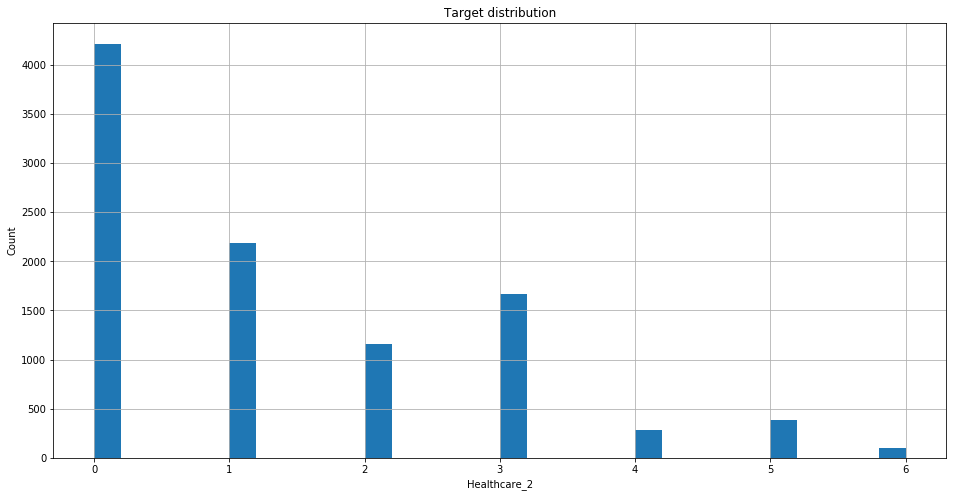

In [78]:
plt.figure(figsize = (16, 8))
train_df['Helthcare_2'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Healthcare_2')
plt.title('Target distribution')
plt.show()

In [79]:
train_df['Helthcare_2'].value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

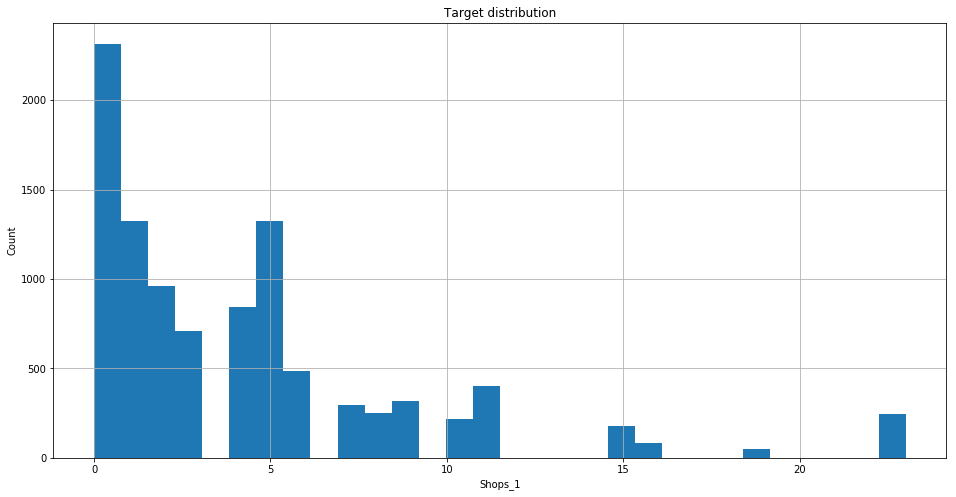

In [80]:
plt.figure(figsize = (16, 8))
train_df['Shops_1'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Shops_1')
plt.title('Target distribution')
plt.show()

In [155]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [156]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Ecology_2'], prefix='Ecology2')], axis=1)

In [48]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology2_A,Ecology2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644,0,1


In [84]:
#train_df=train_df.drop('B', axis=1)
#train_df.head()

In [157]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [158]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Ecology_3'], prefix='Ecology3')], axis=1)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology2_A,Ecology2_B,Ecology3_A,Ecology3_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978.0,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968.0,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977.0,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976.0,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644,0,1,0,1


In [159]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [160]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Shops_2'], prefix='Shops2')], axis=1)


In [161]:
test_df['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [162]:
test_df = pd.concat([test_df, pd.get_dummies(test_df['Ecology_2'], prefix='Ecology2')], axis=1)

In [163]:
test_df['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [164]:
test_df = pd.concat([test_df, pd.get_dummies(test_df['Ecology_3'], prefix='Ecology3')], axis=1)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology2_A,Ecology2_B,Ecology3_A,Ecology3_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B,0,1,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A,0,1,0,1


In [165]:
test_df['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [166]:
test_df = pd.concat([test_df, pd.get_dummies(test_df['Shops_2'], prefix='Shops2')], axis=1)

In [108]:
#test_df=test_df.drop('Shops2_B', axis=1)

In [167]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology2_A,Ecology2_B,Ecology3_A,Ecology3_B,Shops2_A,Shops2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A,0,1,0,1,1,0


In [89]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,ecology2_A,ecology2_B,ecology3_A,ecology3_B,Shops2_A,Shops2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644,0,1,0,1,0,1


In [168]:
train_df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
Ecology2_A       0
Ecology2_B       0
Ecology3_A       0
Ecology3_B       0
Shops2_A         0
Shops2_B         0
dtype: int64

In [169]:
test_df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Ecology2_A       0
Ecology2_B       0
Ecology3_A       0
Ecology3_B       0
Shops2_A         0
Shops2_B         0
dtype: int64

In [170]:
test_df.shape

(5000, 25)

Новые фичи (features) отношение LifeSquare к Square

In [91]:
#train_df['lifesquare_per_square'] = train_df['LifeSquare'] / train_df['Square']

In [52]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology2_A',
 'Ecology2_B',
 'Ecology3_A',
 'Ecology3_B',
 'Shops2_A',
 'Shops2_B']

In [176]:
feature_names = ['DistrictId','Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology2_A', 'Ecology2_B', 'Ecology3_A','Ecology3_B', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops2_A', 'Shops2_B']

#new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

target_name = 'Price'

In [177]:
X = train_df[feature_names] # + new_feature_names
y = train_df[target_name]

In [178]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=21)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr=LinearRegression().fit(X_train,y_train)

In [63]:
y_train_pred = lr.predict(X_train)

In [64]:
print("R^2 на тренировочном наборе: {:.2f}".format(r2(y_train, y_train_pred)))

R^2 на тренировочном наборе: 0.52


In [65]:
y_valid_pred = lr.predict(X_valid)

In [66]:
print("R^2 на валидационном наборе: {:.2f}".format(r2(y_valid, y_valid_pred))) 

R^2 на валидационном наборе: 0.47


In [67]:
from sklearn.linear_model import Ridge

In [82]:
ridge=Ridge(alpha=10).fit(X_train, y_train)

In [83]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [84]:
y_train_pred_ridge = ridge.predict(X_train)

In [85]:
print("R^2 на тренировочном наборе: {:.2f}".format(r2(y_train, y_train_pred_ridge)))

R^2 на тренировочном наборе: 0.52


In [86]:
y_valid_pred_ridge=ridge.predict(X_valid)

In [87]:
print("R^2 на валидационном наборе: {:.2f}".format(r2(y_valid, y_valid_pred_ridge))) 

R^2 на валидационном наборе: 0.47


In [76]:
from sklearn.linear_model import Lasso

In [88]:
lasso=Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)

In [89]:
y_train_pred_lasso = lasso.predict(X_train)

In [90]:
print("R^2 на тренировочном наборе: {:.2f}".format(r2(y_train, y_train_pred_lasso)))

R^2 на тренировочном наборе: 0.52


In [91]:
y_valid_pred_lasso = lasso.predict(X_valid)

In [92]:
print("R^2 на валидационном наборе: {:.2f}".format(r2(y_valid, y_valid_pred_lasso))) 

R^2 на валидационном наборе: 0.47


In [93]:
print("Количество использованных признаков {}".format(np.sum(lasso.coef_ !=0)))

Количество использованных признаков 21


In [173]:
from sklearn.tree import DecisionTreeRegressor

In [174]:
tree=DecisionTreeRegressor(max_depth =7, random_state=0)

In [179]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [180]:
y_train_pred_tree = tree.predict(X_train)

In [181]:
print("R^2 на тренировочном наборе: {:.2f}".format(r2(y_train, y_train_pred_tree)))

R^2 на тренировочном наборе: 0.71


In [182]:
y_valid_pred_tree = tree.predict(X_valid)

In [183]:
print("R^2 на валидационном наборе: {:.2f}".format(r2(y_valid, y_valid_pred_tree))) 

R^2 на валидационном наборе: 0.61


In [184]:
X_test=test_df[feature_names]

In [186]:
y_test=tree.predict(X_test)

In [187]:
test_id = test_df["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id

In [188]:
pred_df["Price"]=y_test

In [189]:
pred_df.head()

,Id,Price
0,725,163263.955126
1,15856,178205.415011
2,5480,125783.638369
3,15664,337015.685631
4,14275,120988.941024


In [190]:
pred_df.to_csv("./predictions_.csv", index=False)

In [191]:
pred_df.shape

(5000, 2)